# Visualización de datos

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Distribuciones de probabilidad

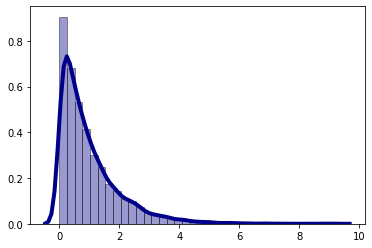

In [40]:
sns.distplot(np.random.exponential(scale = 1, size = 10000) , hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.show()

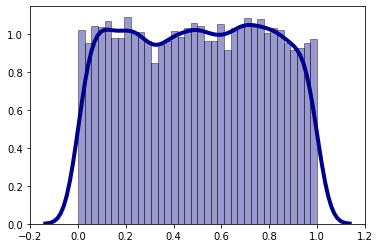

In [39]:
sns.distplot(np.random.uniform(low = 0, high = 1, size = 10000) , hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.show()

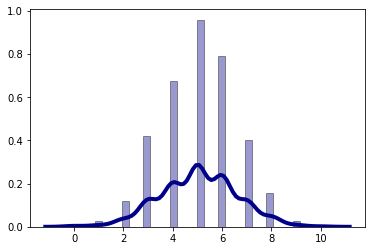

In [52]:
sns.distplot(np.random.binomial(n = 10, p = 0.5, size = 1000) , hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.show()

#Que pasa si aumentamos n?

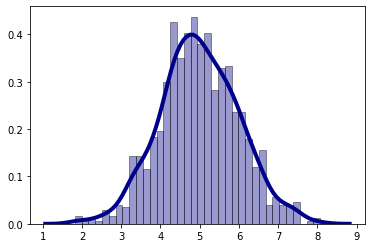

In [56]:
sns.distplot(np.random.normal(5, 1, size = 1000) , hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.show()

## Exploración de datos
Ahora que sabemos como crear histogramas, podemos extender este análisis para un dataframe el cual termina por ser la forma más común en donde encontramos los datos.

In [57]:
df = pd.DataFrame(np.random.normal(3, 1, size=(1000, 4) ), 
                  columns = ['Variable 1', 'Variable 2', 'Variable 3', 'Variable 4'])
df.head()

,Variable 1,Variable 2,Variable 3,Variable 4
0,3.161786,4.368645,0.851630,0.641860
1,1.690615,2.399033,2.967365,2.022739
2,2.213299,3.335820,1.636198,2.821901
3,2.392245,3.224591,2.013463,4.162947
4,3.745258,3.422529,3.885125,4.012784


¿Como podemos explorar los datos de una forma más gráfica? Un buen primer paso es utilizar un histograma para ver si notamos algo acerca de la distribución de los datos.

(0.14476144516211398, 6.626036616692706, 0.0, 138.6)

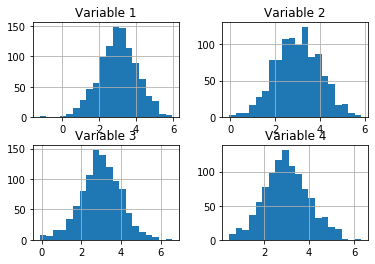

In [58]:
hist = df.hist(bins=20,layout=(2,2))
plt.axis('tight')

(-0.3501214288318236, 6.153068714379755, 0.0, 234.15)

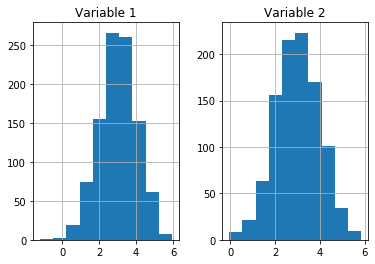

In [59]:
hist=df.hist(bins=10,column=['Variable 1','Variable 2'],layout=(1,2))
plt.axis('tight')

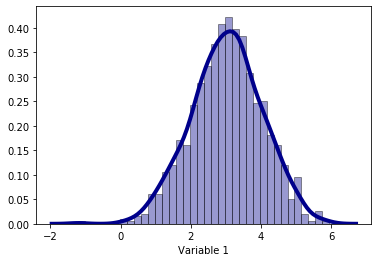

In [60]:
#Usando seaborn podemos ver la funcion de densidad de probabilidad.
sns.distplot(df['Variable 1'] , hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.show()

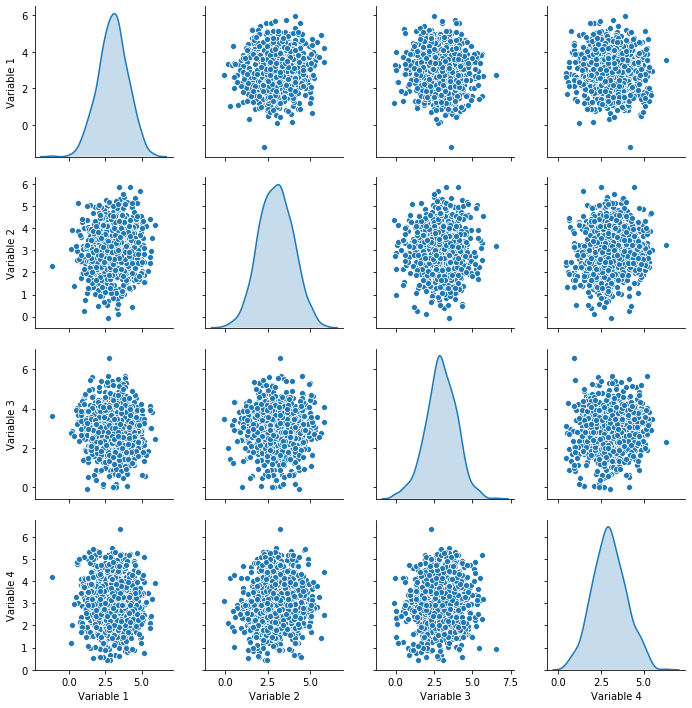

In [61]:
#También podemos extender el análisis.
sns.pairplot(df, diag_kind = 'kde')

Ahora, vamos a explorar como se comportarian los datos si agregamos una columna diferente.

In [81]:
df['Response']= (pd.Series(3*df['Variable 1'] + np.random.normal(0,1,size=1000), index=df.index))
df.head()

,Variable 1,Variable 2,Variable 3,Variable 4,Response
0,3.161786,4.368645,0.851630,0.641860,11.333129
1,1.690615,2.399033,2.967365,2.022739,6.074445
2,2.213299,3.335820,1.636198,2.821901,8.943162
3,2.392245,3.224591,2.013463,4.162947,4.828121
4,3.745258,3.422529,3.885125,4.012784,12.564200


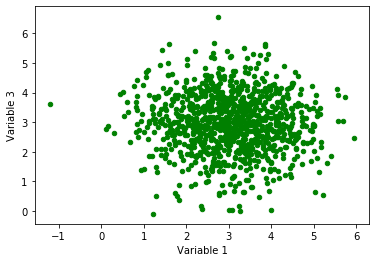

In [63]:
df.plot.scatter(x='Variable 1',y='Variable 3',c='g')
#plt.axis('equal')

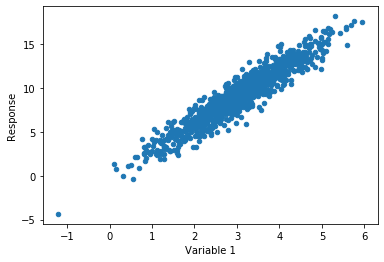

In [82]:
df.plot.scatter(x='Variable 1',y='Response')

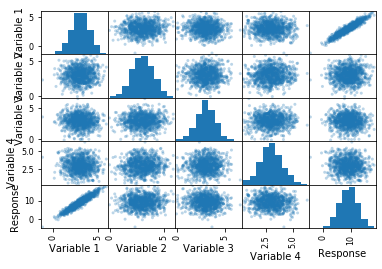

In [83]:
Matrix = pd.plotting.scatter_matrix(df, alpha=0.3)

Tenemos alguna forma de mostrar la dependencia entre las variables? Podríamos intentar usando la correlación lineal.

In [84]:
corr = df.corr()
print(corr)

            Variable 1  Variable 2  Variable 3  Variable 4  Response
Variable 1    1.000000    0.050333   -0.056139   -0.059060  0.948039
Variable 2    0.050333    1.000000    0.016767    0.066880  0.045735
Variable 3   -0.056139    0.016767    1.000000    0.044400 -0.059307
Variable 4   -0.059060    0.066880    0.044400    1.000000 -0.062999
Response      0.948039    0.045735   -0.059307   -0.062999  1.000000


Si queremos visualizar estas relaciones podemos utilizar un mapa de calor, en este caso hay una correlación perfecta entre la respuesta y la variable 1.

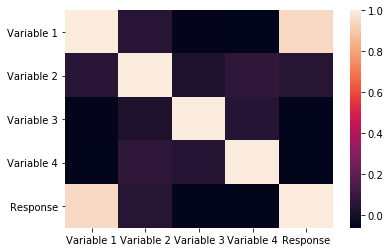

In [85]:
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

# Otras formas de visualización.

Plot de linea.

In [67]:
k=np.arange(0,10,0.01)
df1=pd.DataFrame({'x':k,'y':k**2})

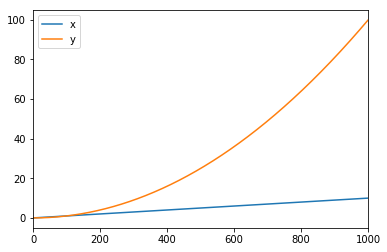

In [69]:
df1.plot.line()
plt.show()

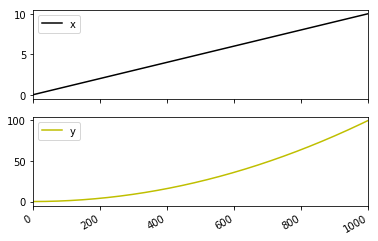

In [74]:
df1.plot.line(subplots=True,color=['k','y'])
plt.show()

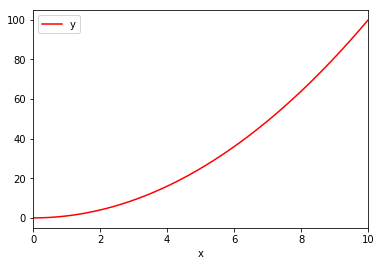

In [72]:
df1.plot.line(x='x',y='y',color='r')
plt.show()

### Gráfica de densidad con matplotlib.
No se vé tan agradable como en seaborn, sin embargo se puede lograr una visualización funcional.

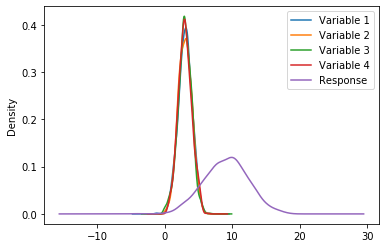

In [86]:
dense=df.plot.density()

## Boxplot

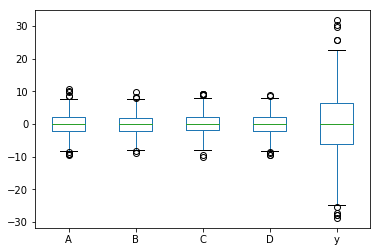

In [107]:
box=df.plot.box()

### Pie chart

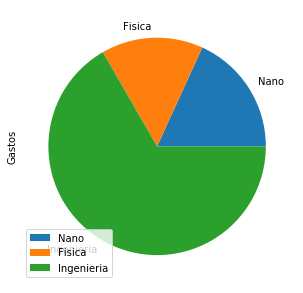

In [165]:
df2 = pd.DataFrame({'Gastos': [1200, 1000 , 4403],'Ganancias': [900, 1200, 4000]},index=['Nano', 'Fisica', 'Ingenieria'])
plot = df2.plot.pie(y='Gastos', figsize=(5, 5))

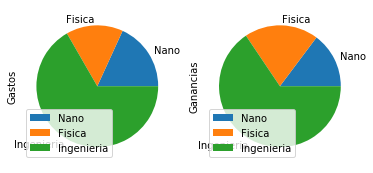

In [166]:
plot = df2.plot.pie(subplots=True)

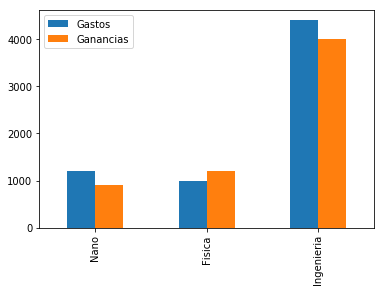

In [167]:
Graf=df2.plot.bar() 

In [168]:
print((df2.iloc[:,0].values-df2.iloc[:,1].values)/df2.iloc[:,1].values)
df2.head()

[ 0.33333333 -0.16666667  0.10075   ]


,Gastos,Ganancias
Nano,1200,900
Fisica,1000,1200
Ingenieria,4403,4000


In [169]:
df2 = df2.assign(Utilidad=np.round((100*(df2.iloc[:,1].values-df2.iloc[:,0].values)/df2.iloc[:,1].values)))
df2.head()

,Gastos,Ganancias,Utilidad
Nano,1200,900,-33.0
Fisica,1000,1200,17.0
Ingenieria,4403,4000,-10.0


,Gastos,Ganancias,Utilidad
Nano,1200.0,900.0,-33.0
Fisica,1000.0,1200.0,17.0
Ingenieria,4403.0,4000.0,-10.0


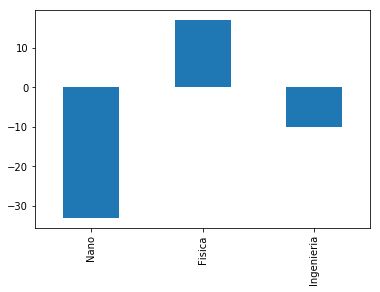

In [181]:
df2=df2.T
df2['Utilidad'].plot.bar()
df2.head()